# Optimizing Sourcing and Pricing Strategies for GlobeHarvest Co. in Kenya

## Collaborators
    . Joyce Chepng'eno
    . Sarah Karanja
    . Brandon Muraya
    . Pete Njagi
    . Tom Mwabire
    . James Koli

## Introduction:
GlobeHarvest Co. is an emerging import-export company poised to enter the Kenyan agricultural market. With a commitment to leveraging data-driven strategies, GlobeHarvest aims to optimize its sourcing and pricing strategies to establish a competitive presence in Kenya's agricultural sector. By harnessing the power of data analytics, GlobeHarvest seeks to gain valuable insights into market dynamics, consumer preferences, and pricing trends to drive informed decision-making and maximize profitability.

## Business Understanding:
Kenya's agricultural market offers immense potential for GlobeHarvest Co., characterized by diverse regions with varying agricultural capabilities and consumer demands. However, navigating this complex landscape presents several challenges, including identifying cost-effective sourcing locations, strategically timing purchases, and ensuring competitive pricing amid price variabilities across regions. To succeed in the Kenyan market, GlobeHarvest must develop a deep understanding of market dynamics, consumer behavior, and competitive factors to optimize its procurement processes and pricing strategies effectively.

## Problem Statement:
GlobeHarvest Co. faces the following key challenges in entering the Kenyan agricultural market:

**Identifying Optimal Sourcing Locations**: The company needs to identify the most cost-effective sourcing locations across different Kenyan counties to minimize procurement costs and ensure a reliable supply chain.

**Timing Purchases Strategically**: GlobeHarvest requires insights into the optimal timing for purchasing various commodities, considering seasonal fluctuations, market trends, and price dynamics.

**Navigating Price Variabilities**: Significant price discrepancies exist across different regions in Kenya, necessitating a systematic approach to ensure competitive pricing and optimize profitability.

**Ensuring Global Competitiveness**: GlobeHarvest aims not only to source commodities but also potentially export products. Understanding how Kenyan prices compare to global averages is essential for identifying export opportunities and maintaining competitiveness in the global market.

## Objectives:
The primary objectives of GlobeHarvest Co. in optimizing its sourcing and pricing strategies for the Kenyan market are as follows:

**Identify Cost-Effective Sourcing Locations**: Analyze data to identify regions in Kenya that offer the most cost-effective sourcing opportunities for various food commodities.

**Strategically Time Purchases**: Utilize historical data and market insights to determine the optimal timing for purchasing specific commodities, considering seasonal trends and market dynamics.

**Navigate Price Variabilities**: Develop strategies to navigate price variabilities across different regions in Kenya, ensuring competitive pricing and maximizing profitability.

**Ensure Global Competitiveness**: Analyze Kenyan prices against global averages to identify competitive advantages and potential export opportunities, positioning GlobeHarvest as a competitive player in the global market.

## Data Understanding:

The dataset obtained from Kaggle consists of food price data collected in Kenya, providing valuable insights into the pricing dynamics of various food commodities across different regions and markets. The dataset contains the following columns:

**date**: The date of the price observation.

**admin1**: The first-level administrative division (e.g., province or county) in Kenya.

**admin2**: The second-level administrative division (e.g., district or sub-county) in Kenya.

**market**: The name of the market where the price was recorded.

**latitude**: The latitude coordinates of the market location.

**longitude**: The longitude coordinates of the market location.

**category**: The category of the food commodity (e.g., cereals and tubers, pulses and nuts, meat, fish, and eggs).

**commodity**: The specific name of the food commodity.

**unit**: The unit of measurement for the price (e.g., KG for kilograms, G for grams).

**priceflag**: Flag indicating the nature of the price observation (e.g., actual, aggregate).

**pricetype**: The type of price (e.g., Wholesale, Retail).

**currency**: The currency used for pricing (e.g., KES for Kenyan Shilling).

**price**: The price of the commodity in the local currency.

**usdprice**: The price of the commodity converted to USD.

The dataset contains 10,767 rows, each representing a unique observation of food prices in a specific market on a particular date. This dataset provides a comprehensive view of food pricing trends and variations across different regions and market types in Kenya, offering valuable insights for analysis and decision-making in the agricultural sector.

In [1]:
# Importing relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display, HTML
from IPython.display import IFrame

In [2]:
df = pd.read_csv('wfp_food_prices_ken.csv')
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Maize flour,KG,aggregate,Retail,KES,92.0,0.6031
10763,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Potatoes (Irish),KG,aggregate,Retail,KES,73.0,0.4785
10764,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,"meat, fish and eggs",Meat (goat),KG,aggregate,Retail,KES,800.0,5.2442
10765,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,aggregate,Retail,KES,10.0,0.0656


In [3]:
df.shape

(10767, 14)

In [4]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop(0)

In [7]:
df = df.drop(['priceflag', 'usdprice'], axis=1)

In [8]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,Wholesale,KES,16.13
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,Wholesale,KES,33.63
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3246.0
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,Retail,KES,17.0
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,Retail,KES,39.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10766 entries, 1 to 10766
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       10766 non-null  object
 1   admin1     10766 non-null  object
 2   admin2     10766 non-null  object
 3   market     10766 non-null  object
 4   latitude   10766 non-null  object
 5   longitude  10766 non-null  object
 6   category   10766 non-null  object
 7   commodity  10766 non-null  object
 8   unit       10766 non-null  object
 9   pricetype  10766 non-null  object
 10  currency   10766 non-null  object
 11  price      10766 non-null  object
dtypes: object(12)
memory usage: 1009.4+ KB


In [10]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price
count,10766,10766,10766,10766,10766,10766,10766,10766,10766,10766,10766,10766
unique,215,7,22,62,62,62,8,47,14,2,1,5238
top,2021-03-15,Rift Valley,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize (white),KG,Wholesale,KES,10.0
freq,375,4163,2290,1138,1138,1138,5311,1128,4783,5752,10766,240


In [11]:
print("\nUnique Values for Categorical Columns:")
for col in df.select_dtypes(include=['object']):
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values for Categorical Columns:
date: 215 unique values
admin1: 7 unique values
admin2: 22 unique values
market: 62 unique values
latitude: 62 unique values
longitude: 62 unique values
category: 8 unique values
commodity: 47 unique values
unit: 14 unique values
pricetype: 2 unique values
currency: 1 unique values
price: 5238 unique values


## Feature Engineering

In [12]:
#changing collumn Names for easy understanding and analysis
df = df.rename(columns={'admin1': 'Provinces', 'admin2': 'Counties'})

In [13]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [14]:
# Standardazing our metrics 
conversion_factors = {
    'KG': 1,
    '90 KG': 90,
    '400 G': 0.4,
    '50 KG': 50,
    '500 ML': 0.5,
    'L': 1,  
    '200 ML': 0.2,
    'Unit': 1,  
    'Bunch': 1,  
    '64 KG': 64,
    '13 KG': 13,
    '126 KG': 126,
    '200 G': 0.2,
    'Head': 1  
}


def standardize_unit(row):
    unit = row['unit']
    if unit in conversion_factors:
        return conversion_factors[unit]
    else:
        return None  


df['standardized_unit'] = df.apply(standardize_unit, axis=1)

print(df.head())  


        date Provinces Counties   market   latitude  longitude  \
1 2006-01-15     Coast  Mombasa  Mombasa      -4.05  39.666667   
2 2006-01-15     Coast  Mombasa  Mombasa      -4.05  39.666667   
3 2006-01-15     Coast  Mombasa  Mombasa      -4.05  39.666667   
4 2006-01-15   Eastern    Kitui    Kitui  -1.366667  38.016667   
5 2006-01-15   Eastern    Kitui    Kitui  -1.366667  38.016667   

             category      commodity   unit  pricetype currency   price  \
1  cereals and tubers          Maize     KG  Wholesale      KES   16.13   
2     pulses and nuts          Beans     KG  Wholesale      KES   33.63   
3     pulses and nuts    Beans (dry)  90 KG  Wholesale      KES  3246.0   
4  cereals and tubers  Maize (white)     KG     Retail      KES    17.0   
5     pulses and nuts    Beans (dry)     KG     Retail      KES    39.0   

   standardized_unit  
1                1.0  
2                1.0  
3               90.0  
4                1.0  
5                1.0  


In [15]:
df

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,standardized_unit
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,Wholesale,KES,16.13,1.0
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,Wholesale,KES,33.63,1.0
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3246.0,90.0
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,Retail,KES,17.0,1.0
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,Retail,KES,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Maize flour,KG,Retail,KES,92.0,1.0
10763,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Potatoes (Irish),KG,Retail,KES,73.0,1.0
10764,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,"meat, fish and eggs",Meat (goat),KG,Retail,KES,800.0,1.0
10765,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,Retail,KES,10.0,0.2


In [16]:

filtered_df = df[(df['unit'] == 'Bunch') | (df['unit'] == 'Head')| (df['unit'] == 'unit')]

print(filtered_df)


           date      Provinces Counties                 market  \
4336 2020-08-15        Nairobi  Nairobi                Nairobi   
7163 2021-01-15          Coast  Mombasa   Bangladesh (Mombasa)   
7171 2021-01-15          Coast  Mombasa     Kalahari (Mombasa)   
7172 2021-01-15          Coast  Mombasa     Kalahari (Mombasa)   
7197 2021-01-15        Nairobi  Nairobi   Kawangware (Nairobi)   
7198 2021-01-15        Nairobi  Nairobi   Kawangware (Nairobi)   
7216 2021-01-15        Nairobi  Nairobi       Mukuru (Nairobi)   
7224 2021-01-15  North Eastern  Garissa     Dagahaley (Daadab)   
7234 2021-01-15  North Eastern  Garissa      Hagadera (Daadab)   
7243 2021-01-15    Rift Valley  Turkana  Kalobeyei (Village 1)   
7249 2021-01-15    Rift Valley  Turkana  Kalobeyei (Village 2)   
7267 2021-02-15        Eastern   Isiolo            Isiolo town   
7282 2021-02-15        Nairobi  Nairobi      Dandora (Nairobi)   
7292 2021-02-15        Nairobi  Nairobi      Kangemi (Nairobi)   
7293 2021-

In [17]:
filtered_df

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,standardized_unit
4336,2020-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,vegetables and fruits,Kale,Bunch,Retail,KES,6.0,1.0
7163,2021-01-15,Coast,Mombasa,Bangladesh (Mombasa),-4.011759614,39.63346,vegetables and fruits,Kale,Bunch,Retail,KES,10.0,1.0
7171,2021-01-15,Coast,Mombasa,Kalahari (Mombasa),-4.03142174,39.63053881,vegetables and fruits,Cabbage,Head,Retail,KES,50.0,1.0
7172,2021-01-15,Coast,Mombasa,Kalahari (Mombasa),-4.03142174,39.63053881,vegetables and fruits,Kale,Bunch,Retail,KES,10.0,1.0
7197,2021-01-15,Nairobi,Nairobi,Kawangware (Nairobi),-1.28444,36.74361,vegetables and fruits,Cabbage,Head,Retail,KES,40.0,1.0
7198,2021-01-15,Nairobi,Nairobi,Kawangware (Nairobi),-1.28444,36.74361,vegetables and fruits,Kale,Bunch,Retail,KES,5.0,1.0
7216,2021-01-15,Nairobi,Nairobi,Mukuru (Nairobi),-1.3027,36.8844,vegetables and fruits,Kale,Bunch,Retail,KES,5.0,1.0
7224,2021-01-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Kale,Bunch,Retail,KES,40.0,1.0
7234,2021-01-15,North Eastern,Garissa,Hagadera (Daadab),0.005502,40.367772,vegetables and fruits,Kale,Bunch,Retail,KES,40.0,1.0
7243,2021-01-15,Rift Valley,Turkana,Kalobeyei (Village 1),3.7685127183795,34.7279993724078,vegetables and fruits,Cabbage,Head,Retail,KES,70.0,1.0


In [18]:
contains_strings = pd.to_numeric(df['standardized_unit'], errors='coerce').isnull().any()

if contains_strings:
    print("The 'standardized_unit' column contains strings.")
else:
    print("The 'standardized_unit' column does not contain strings.")


The 'standardized_unit' column does not contain strings.


In [19]:

check_strings = pd.to_numeric(df['price']).isnull().any()

if check_strings:
    print("The 'price' column contains strings.")
else:
    print("The 'price' column does not contain strings.")



The 'price' column does not contain strings.


In [20]:
df.dtypes

date                 datetime64[ns]
Provinces                    object
Counties                     object
market                       object
latitude                     object
longitude                    object
category                     object
commodity                    object
unit                         object
pricetype                    object
currency                     object
price                        object
standardized_unit           float64
dtype: object

In [21]:
df['price'] = df['price'].astype(float)

In [22]:
df.dtypes

date                 datetime64[ns]
Provinces                    object
Counties                     object
market                       object
latitude                     object
longitude                    object
category                     object
commodity                    object
unit                         object
pricetype                    object
currency                     object
price                       float64
standardized_unit           float64
dtype: object

In [23]:
df['price_per_standard_unit'] = df['price'] / df['standardized_unit']
df

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,standardized_unit,price_per_standard_unit
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,Wholesale,KES,16.13,1.0,16.130000
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,Wholesale,KES,33.63,1.0,33.630000
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3246.00,90.0,36.066667
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,Retail,KES,17.00,1.0,17.000000
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,Retail,KES,39.00,1.0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Maize flour,KG,Retail,KES,92.00,1.0,92.000000
10763,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Potatoes (Irish),KG,Retail,KES,73.00,1.0,73.000000
10764,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,"meat, fish and eggs",Meat (goat),KG,Retail,KES,800.00,1.0,800.000000
10765,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,Retail,KES,10.00,0.2,50.000000


In [24]:
df.loc[df['unit'] == "Unit"]

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,standardized_unit,price_per_standard_unit
4335,2020-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,vegetables and fruits,Bananas,Unit,Retail,KES,8.0,1.0,8.0
7156,2018-01-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Bananas,Unit,Retail,KES,10.0,1.0,10.0
7170,2021-01-15,Coast,Mombasa,Kalahari (Mombasa),-4.03142174,39.63053881,vegetables and fruits,Bananas,Unit,Retail,KES,10.0,1.0,10.0
7187,2021-01-15,Nairobi,Nairobi,Kangemi (Nairobi),-1.269275,36.744238,vegetables and fruits,Bananas,Unit,Retail,KES,10.0,1.0,10.0
7196,2021-01-15,Nairobi,Nairobi,Kawangware (Nairobi),-1.28444,36.74361,vegetables and fruits,Bananas,Unit,Retail,KES,10.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10622,2023-11-15,Rift Valley,Turkana,HongKong (Kakuma),3.747204,34.83929,vegetables and fruits,Bananas,Unit,Retail,KES,20.0,1.0,20.0
10640,2023-11-15,Rift Valley,Turkana,Kakuma 3,3.768113,34.82177,vegetables and fruits,Bananas,Unit,Retail,KES,20.0,1.0,20.0
10687,2023-12-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Bananas,Unit,Retail,KES,10.0,1.0,10.0
10719,2023-12-15,Rift Valley,Turkana,HongKong (Kakuma),3.747204,34.83929,vegetables and fruits,Bananas,Unit,Retail,KES,20.0,1.0,20.0


In [25]:
df['Provinces'].unique()

array(['Coast', 'Eastern', 'Nairobi', 'North Eastern', 'Nyanza',
       'Rift Valley', 'Central'], dtype=object)

In [26]:
df['Counties'].unique()

array(['Mombasa', 'Kitui', 'Marsabit', 'Nairobi', 'Mandera', 'Kisumu',
       'Turkana', 'Uasin Gishu', 'Nakuru', 'Kilifi', 'Tana River',
       'Garissa', 'Baringo', 'Kajiado', 'Nyeri', 'Kwale', 'Makueni',
       'Machakos', 'West Pokot', 'Meru South', 'Isiolo', 'Wajir'],
      dtype=object)

In [27]:
# interquartile range (IQR) for the price per unit column
Q1 = df['price_per_standard_unit'].quantile(0.25)
Q3 = df['price_per_standard_unit'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = df[(df['price_per_standard_unit'] < lower_bound) | (df['price_per_standard_unit'] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
            date    Provinces Counties                 market  \
1318  2011-02-15      Nairobi  Nairobi                Nairobi   
1342  2011-03-15      Nairobi  Nairobi                Nairobi   
1364  2011-04-15      Nairobi  Nairobi                Nairobi   
1386  2011-05-15      Nairobi  Nairobi                Nairobi   
1412  2011-06-15      Nairobi  Nairobi                Nairobi   
...          ...          ...      ...                    ...   
10756 2023-12-15  Rift Valley  Turkana  Kalobeyei (Village 2)   
10758 2023-12-15  Rift Valley  Turkana  Kalobeyei (Village 2)   
10759 2023-12-15  Rift Valley  Turkana  Kalobeyei (Village 2)   
10764 2023-12-15  Rift Valley  Turkana     Mogadishu (Kakuma)   
10766 2023-12-15  Rift Valley  Turkana     Mogadishu (Kakuma)   

               latitude         longitude             category  \
1318          -1.283333         36.816667         oil and fats   
1342          -1.283333         36.816667         oil and fats   
1364       

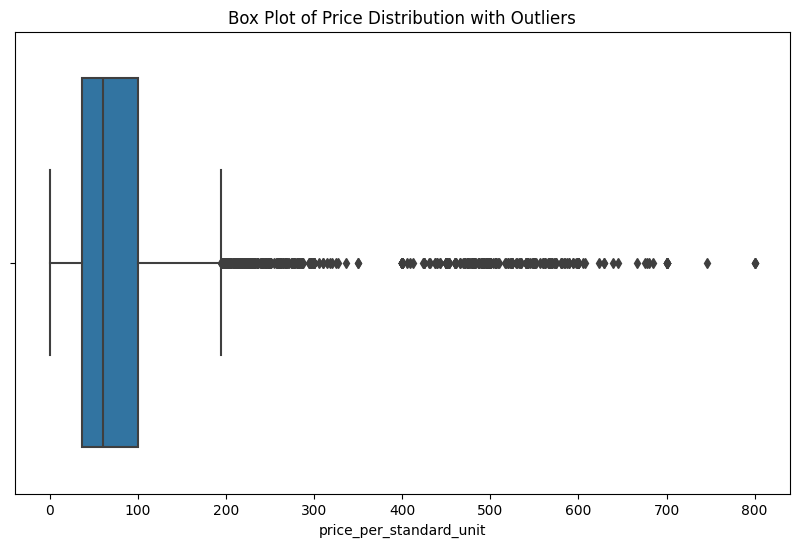

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_per_standard_unit', data=df)
plt.title('Box Plot of Price Distribution with Outliers')
plt.xlabel('price_per_standard_unit')
plt.show()

# Prices vary depending on the comodity

## EXPLONATORY DATA ANALYSIS

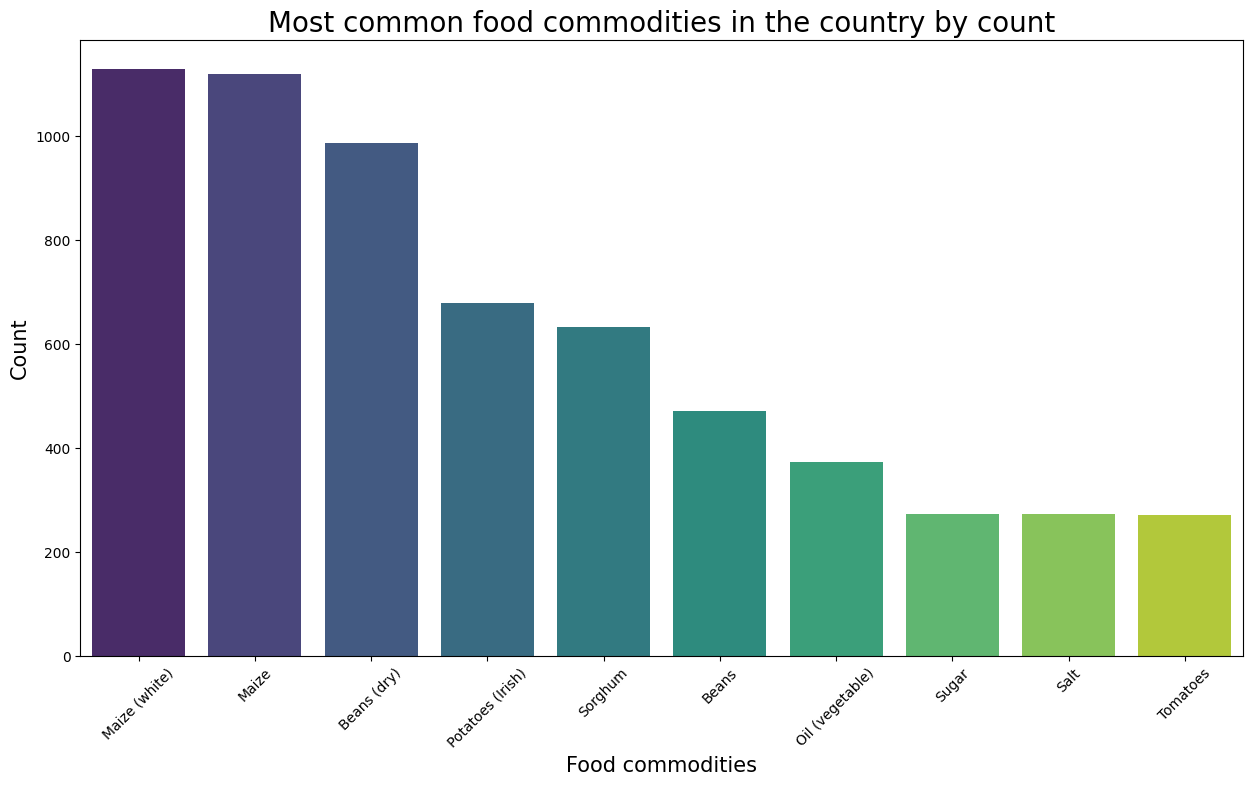

In [29]:

# Sample data
cities = df['commodity'].value_counts()[:10].index
counts = df['commodity'].value_counts()[:10]

# Generate a seaborn color palette
colors = sns.color_palette("viridis", len(cities))

# Plotting the bar graph with unique colors
plt.figure(figsize=(15, 8))
sns.barplot(x=cities, y=counts, palette=colors)
plt.xlabel("Food commodities", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Most common food commodities in the country by count", fontsize=20)
plt.xticks(rotation=45)
plt.show()


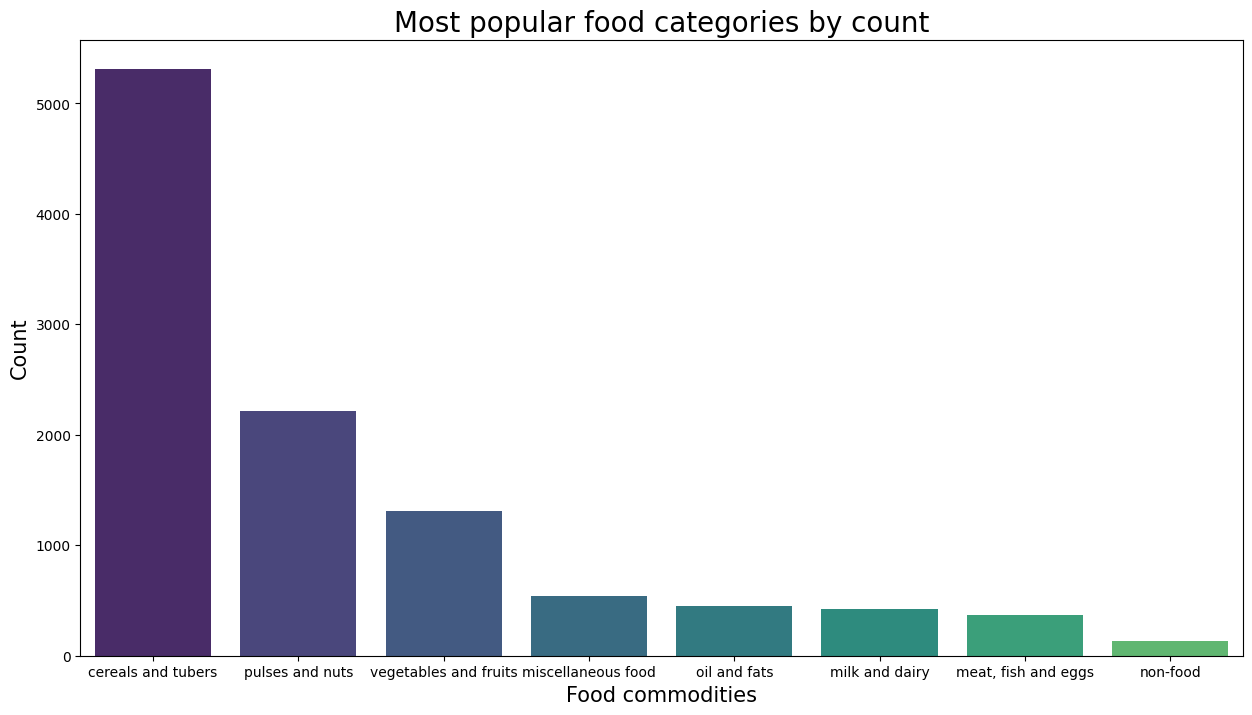

In [30]:
food_categorises = df['category'].value_counts()[:10].index
counts = df['category'].value_counts()[:10]

# Plotting the bar graph with unique colors using Seaborn
colors = sns.color_palette("viridis", len(cities))

plt.figure(figsize=(15, 8))
sns.barplot(x=food_categorises, y=counts, palette=colors)
plt.xlabel("Food commodities", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Most popular food categories by count", fontsize=20)

plt.show()

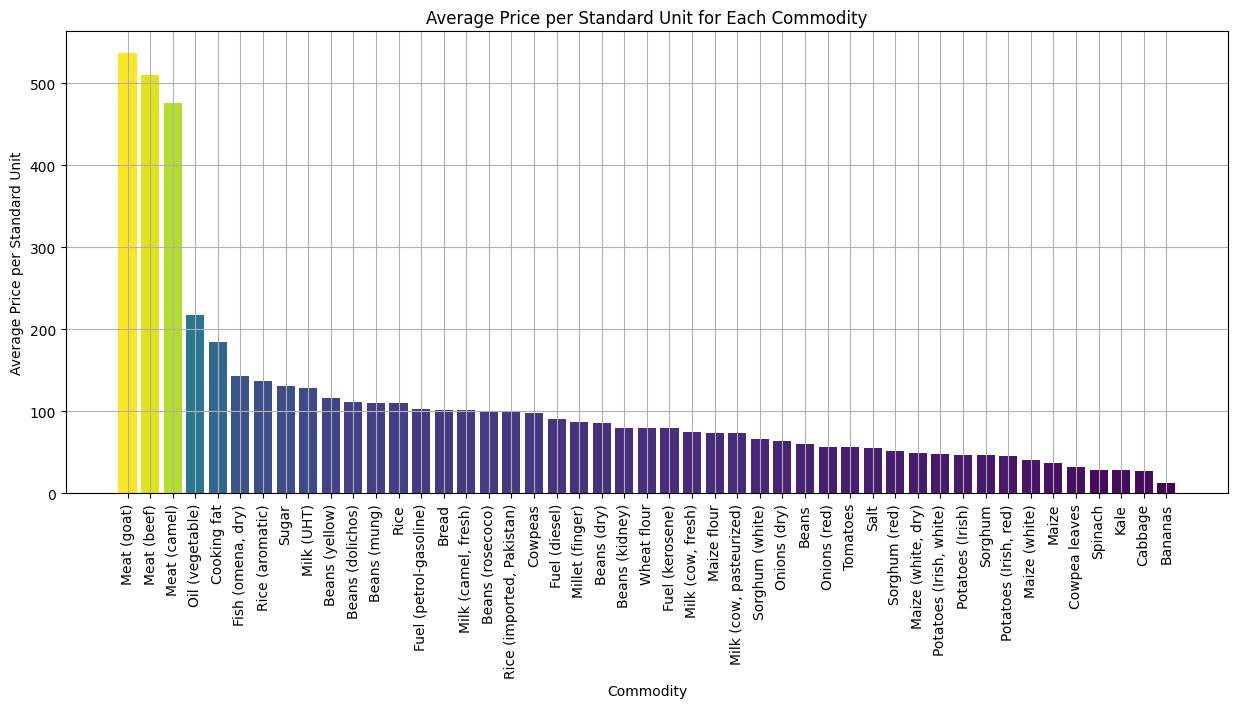

In [31]:

# Calculating the average price per standard unit for each commodity
average_price_per_unit = df.groupby('commodity')['price_per_standard_unit'].mean().sort_values(ascending=False)


cmap = plt.cm.viridis

# Normalizing the average prices to [0, 1] range for colormap mapping
normalized_prices = (average_price_per_unit.values - average_price_per_unit.values.min()) / (average_price_per_unit.values.max() - average_price_per_unit.values.min())

# Creating a bar plot with varied colors based on the average price per standard unit
plt.figure(figsize=(15, 6))
bars = plt.bar(x=average_price_per_unit.index, height=average_price_per_unit.values, color=cmap(normalized_prices))
plt.title('Average Price per Standard Unit for Each Commodity')
plt.xlabel('Commodity')
plt.ylabel('Average Price per Standard Unit')
plt.xticks(rotation=90)
plt.grid(True)




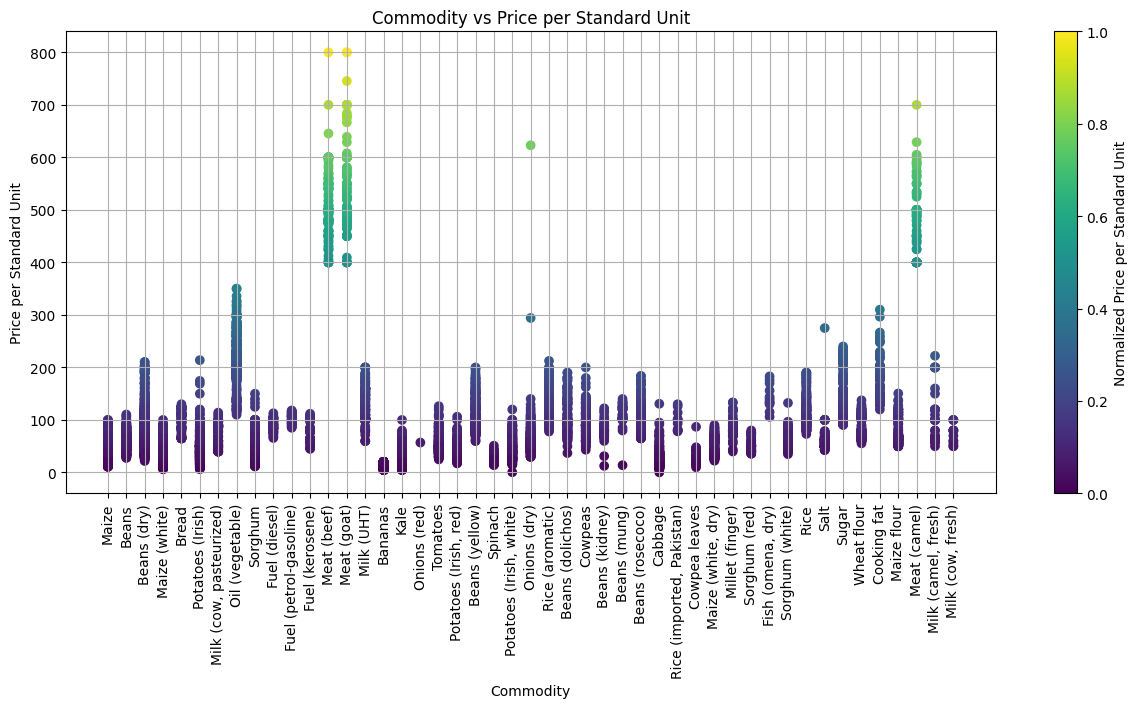

In [32]:
# Define colormap and normalize price_per_standard_unit for colormap mapping
cmap = plt.cm.viridis
normalized_prices = (df['price_per_standard_unit'] - df['price_per_standard_unit'].min()) / (df['price_per_standard_unit'].max() - df['price_per_standard_unit'].min())

# Create scatter plot with varied colors based on price_per_standard_unit
plt.figure(figsize=(15, 6))
plt.scatter(df['commodity'], df['price_per_standard_unit'], c=normalized_prices, cmap=cmap)
plt.title('Commodity vs Price per Standard Unit')
plt.xlabel('Commodity')
plt.ylabel('Price per Standard Unit')
plt.xticks(rotation=90)
plt.colorbar(label='Normalized Price per Standard Unit')
plt.grid(True)
plt.show()

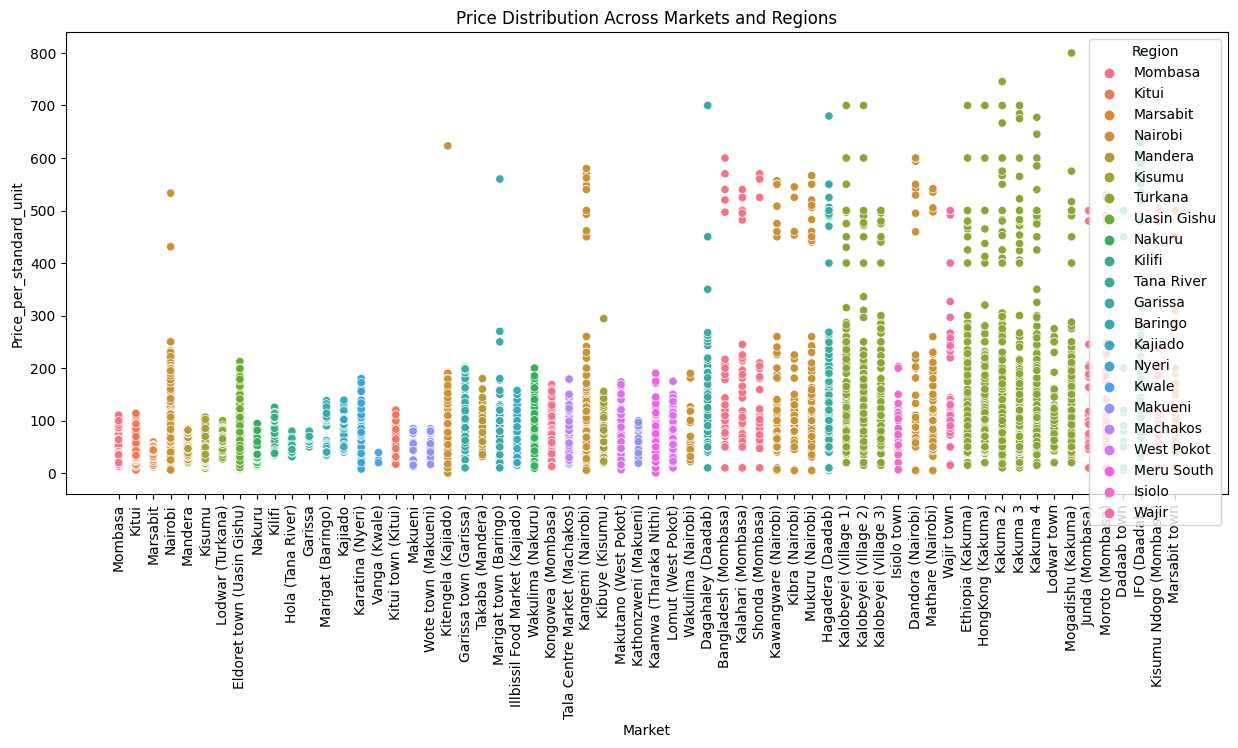

In [33]:
grouped_data = df.groupby(['market', 'Counties'])

# Calculate summary statistics for prices within each group
summary_stats = grouped_data['price_per_standard_unit'].describe()

# Visualize the price distribution across different markets and regions using box plots
plt.figure(figsize=(15, 6))
sns.scatterplot(x='market', y='price_per_standard_unit', hue='Counties', data=df)
plt.title('Price Distribution Across Markets and Regions')
plt.xlabel('Market')
plt.ylabel('Price_per_standard_unit')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()


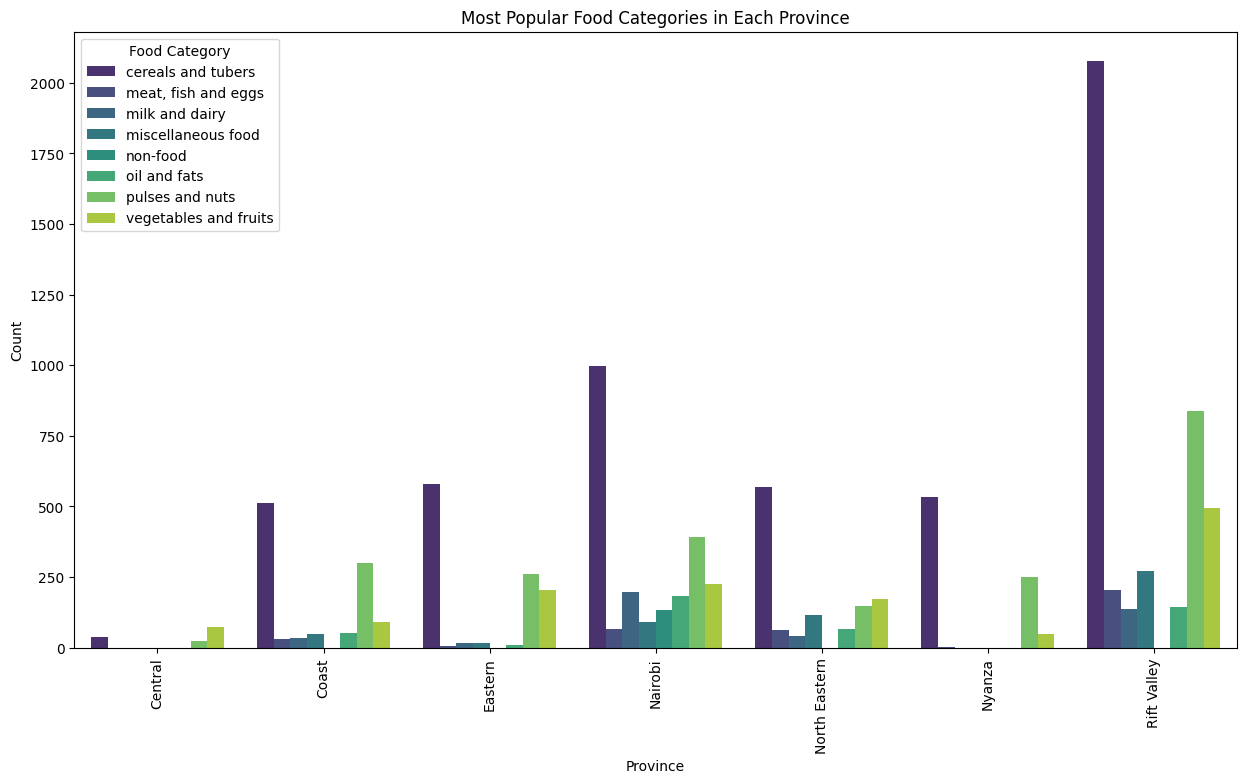

In [34]:
# Group the data by province and food category to count occurrences
province_category_counts = df.groupby(['Provinces', 'category']).size().unstack(fill_value=0)

# Group the data by province and commodity to count occurrences
province_commodity_counts = df.groupby(['Provinces', 'commodity']).size().unstack(fill_value=0)

# Find the most popular food category in each province
most_popular_categories = province_category_counts.idxmax(axis=1)

# Find the most common commodities overall
most_common_commodities = df['commodity'].value_counts().head(10)

# Plot most popular food categories in each province
plt.figure(figsize=(15, 8))
sns.barplot(data=province_category_counts.reset_index().melt(id_vars='Provinces', var_name='Food Category', value_name='Count'),
            x='Provinces', y='Count', hue='Food Category', palette='viridis')
plt.title('Most Popular Food Categories in Each Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Food Category')
plt.show()



In [35]:
provinces_list = df['Provinces'].unique().tolist()
print(len(provinces_list))

7


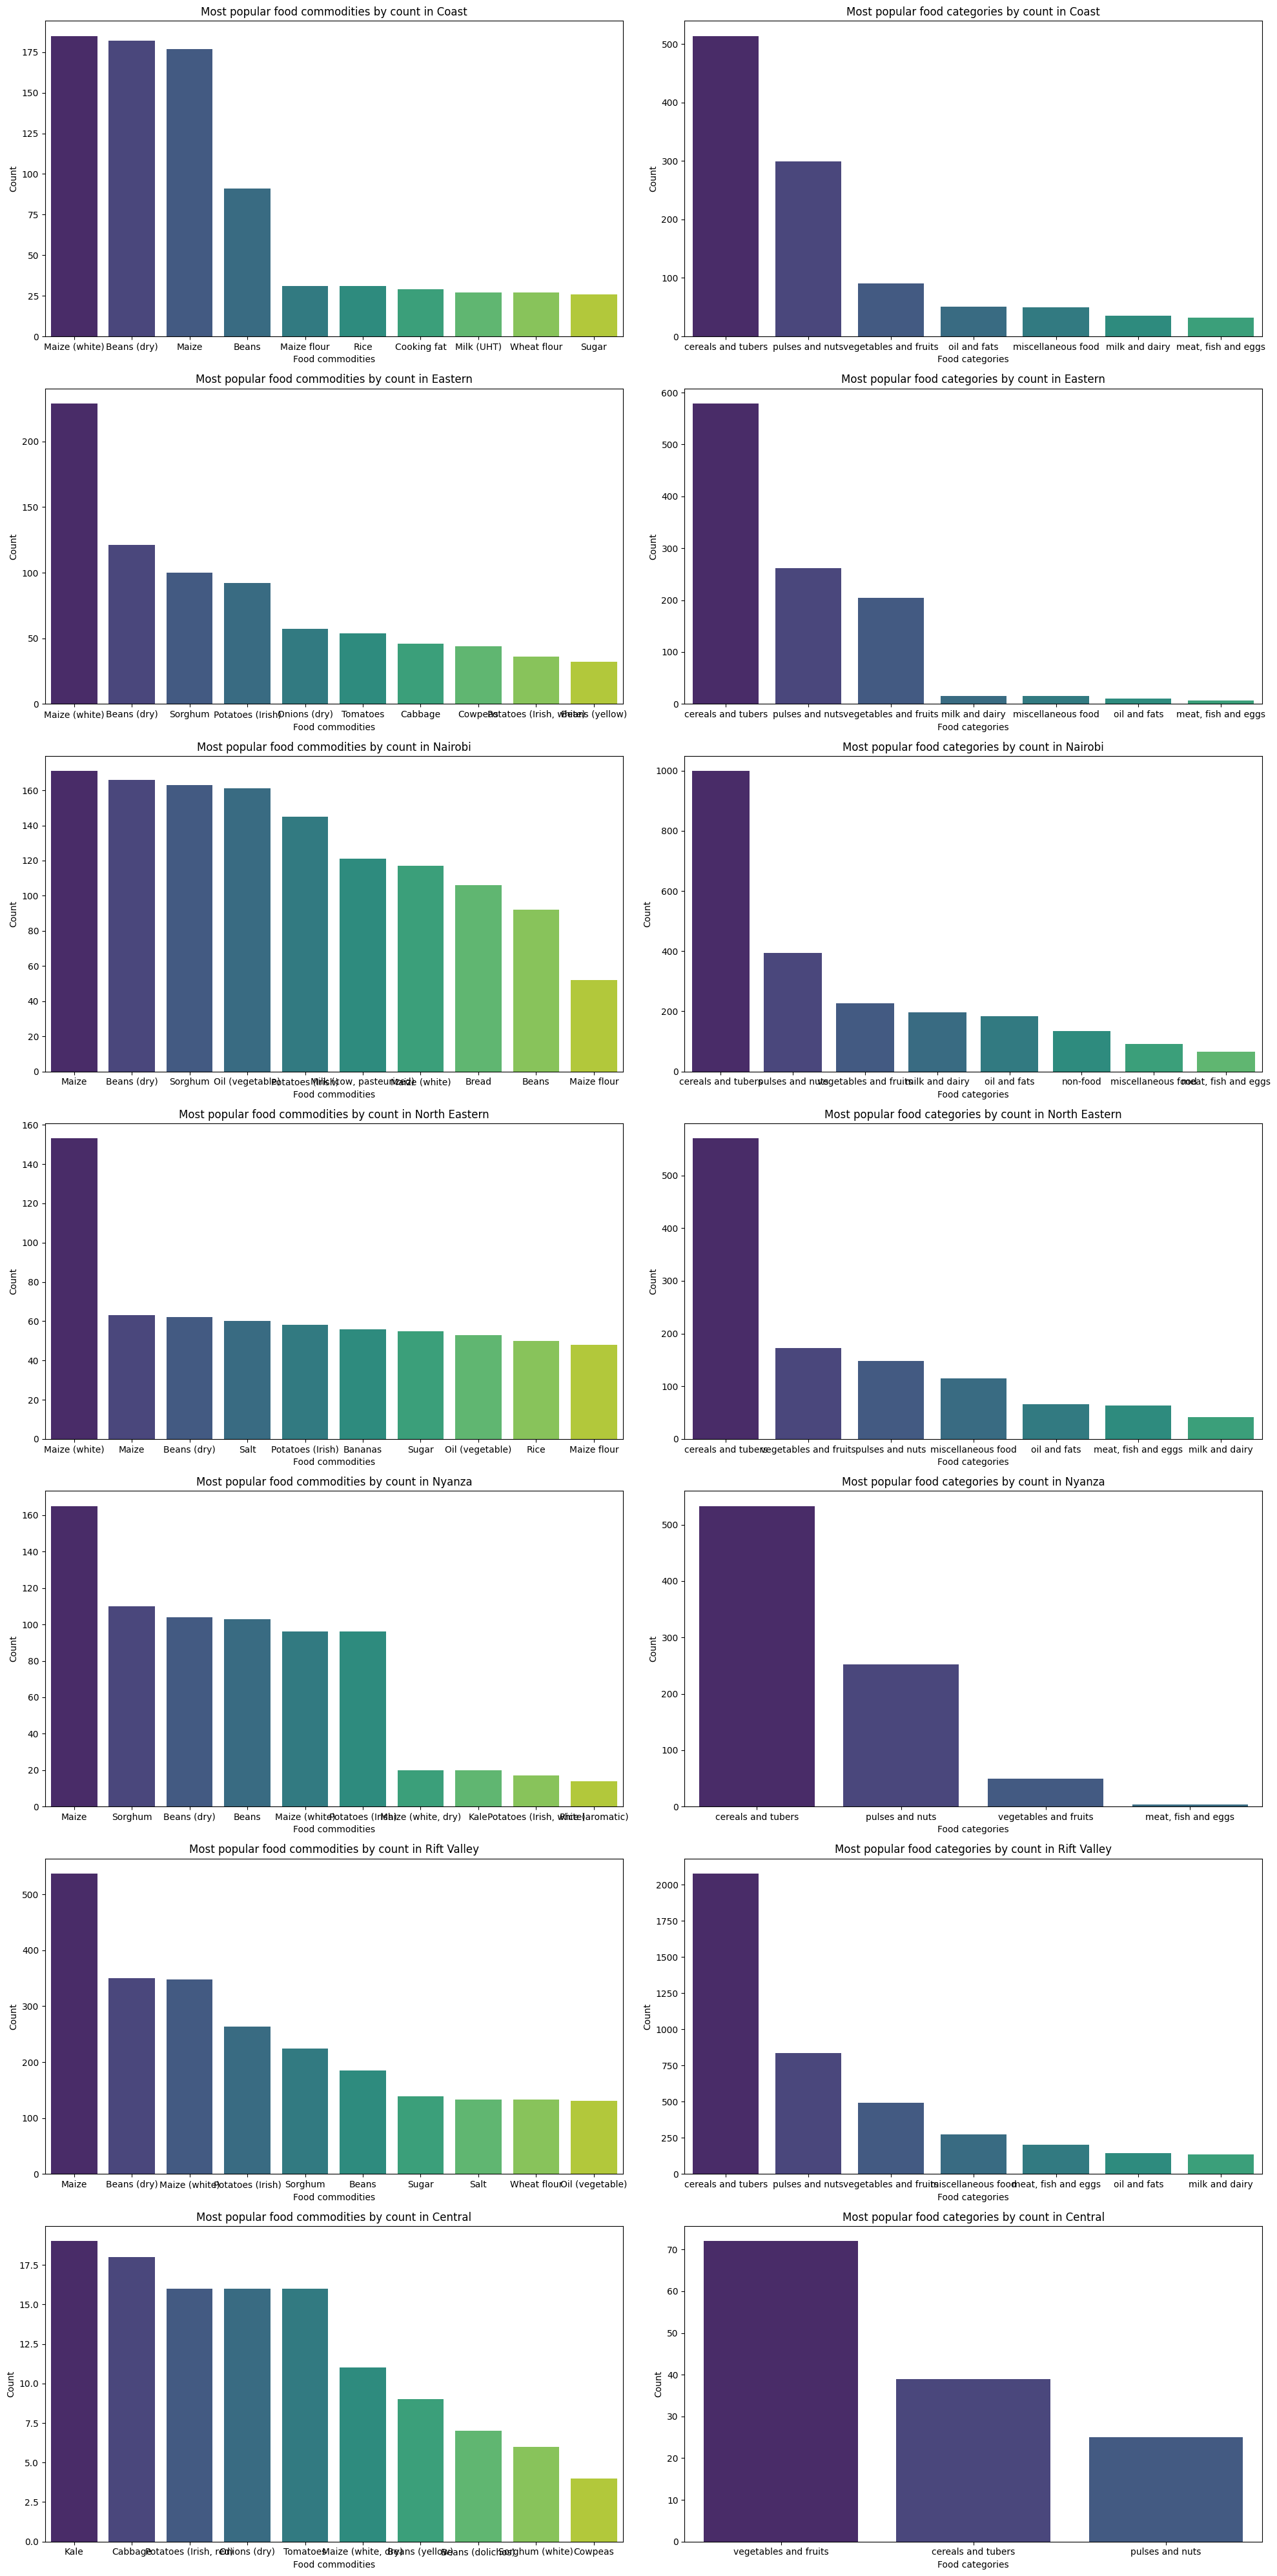

In [36]:
# Create subplots
fig, ax = plt.subplots(7, 2, figsize=(20, 40))

# Loop over provinces
row_count = 0
for province in provinces_list:
    province_df = df.loc[df['Provinces'] == province]

    # Plot most popular food commodities by count
    commodity_cat = province_df['commodity'].value_counts()[:10].index
    commodity_count = province_df['commodity'].value_counts()[:10]
    sns.barplot(x=commodity_cat, y=commodity_count, palette=colors, ax=ax[row_count, 0])
    ax[row_count, 0].set_xlabel("Food commodities")
    ax[row_count, 0].set_ylabel("Count")
    ax[row_count, 0].set_title(f"Most popular food commodities by count in {province}")

    # Plot most popular food categories by count
    food_categories = province_df['category'].value_counts()[:10].index
    food_categories_counts = province_df['category'].value_counts()[:10]
    sns.barplot(x=food_categories, y=food_categories_counts, palette=colors, ax=ax[row_count, 1])
    ax[row_count, 1].set_xlabel("Food categories")
    ax[row_count, 1].set_ylabel("Count")
    ax[row_count, 1].set_title(f"Most popular food categories by count in {province}")

    row_count += 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Comparing wholesale and retail prices

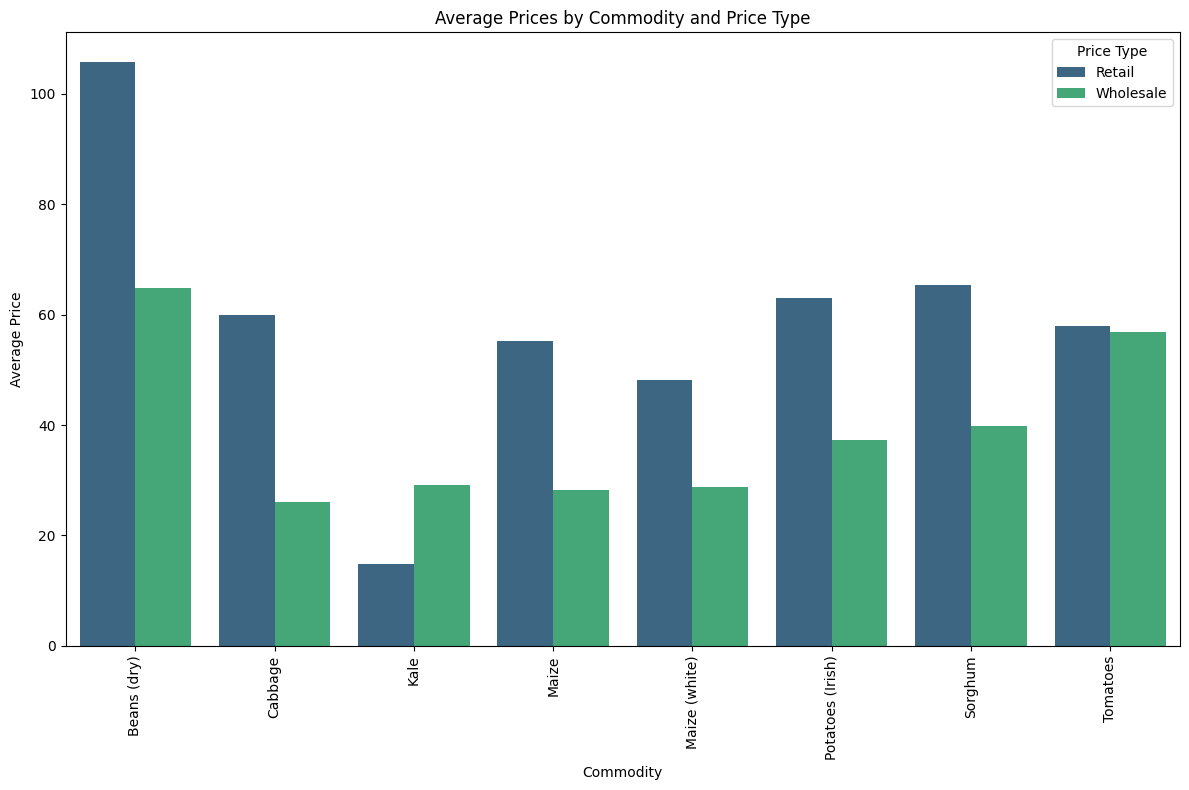

In [37]:
# Filter data for commodities with both wholesale and retail prices
commodities_with_both_prices = df.groupby('commodity')['pricetype'].nunique()
commodities_with_both_prices = commodities_with_both_prices[commodities_with_both_prices == 2].index.tolist()
filtered_df = df[df['commodity'].isin(commodities_with_both_prices)]

# Calculate average prices
average_prices = filtered_df.groupby(['commodity', 'pricetype'])['price_per_standard_unit'].mean().unstack().reset_index()

# Plot average prices using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=average_prices.melt(id_vars='commodity', var_name='Price Type', value_name='Average Price'),
            x='commodity', y='Average Price', hue='Price Type', palette='viridis')
plt.title('Average Prices by Commodity and Price Type')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

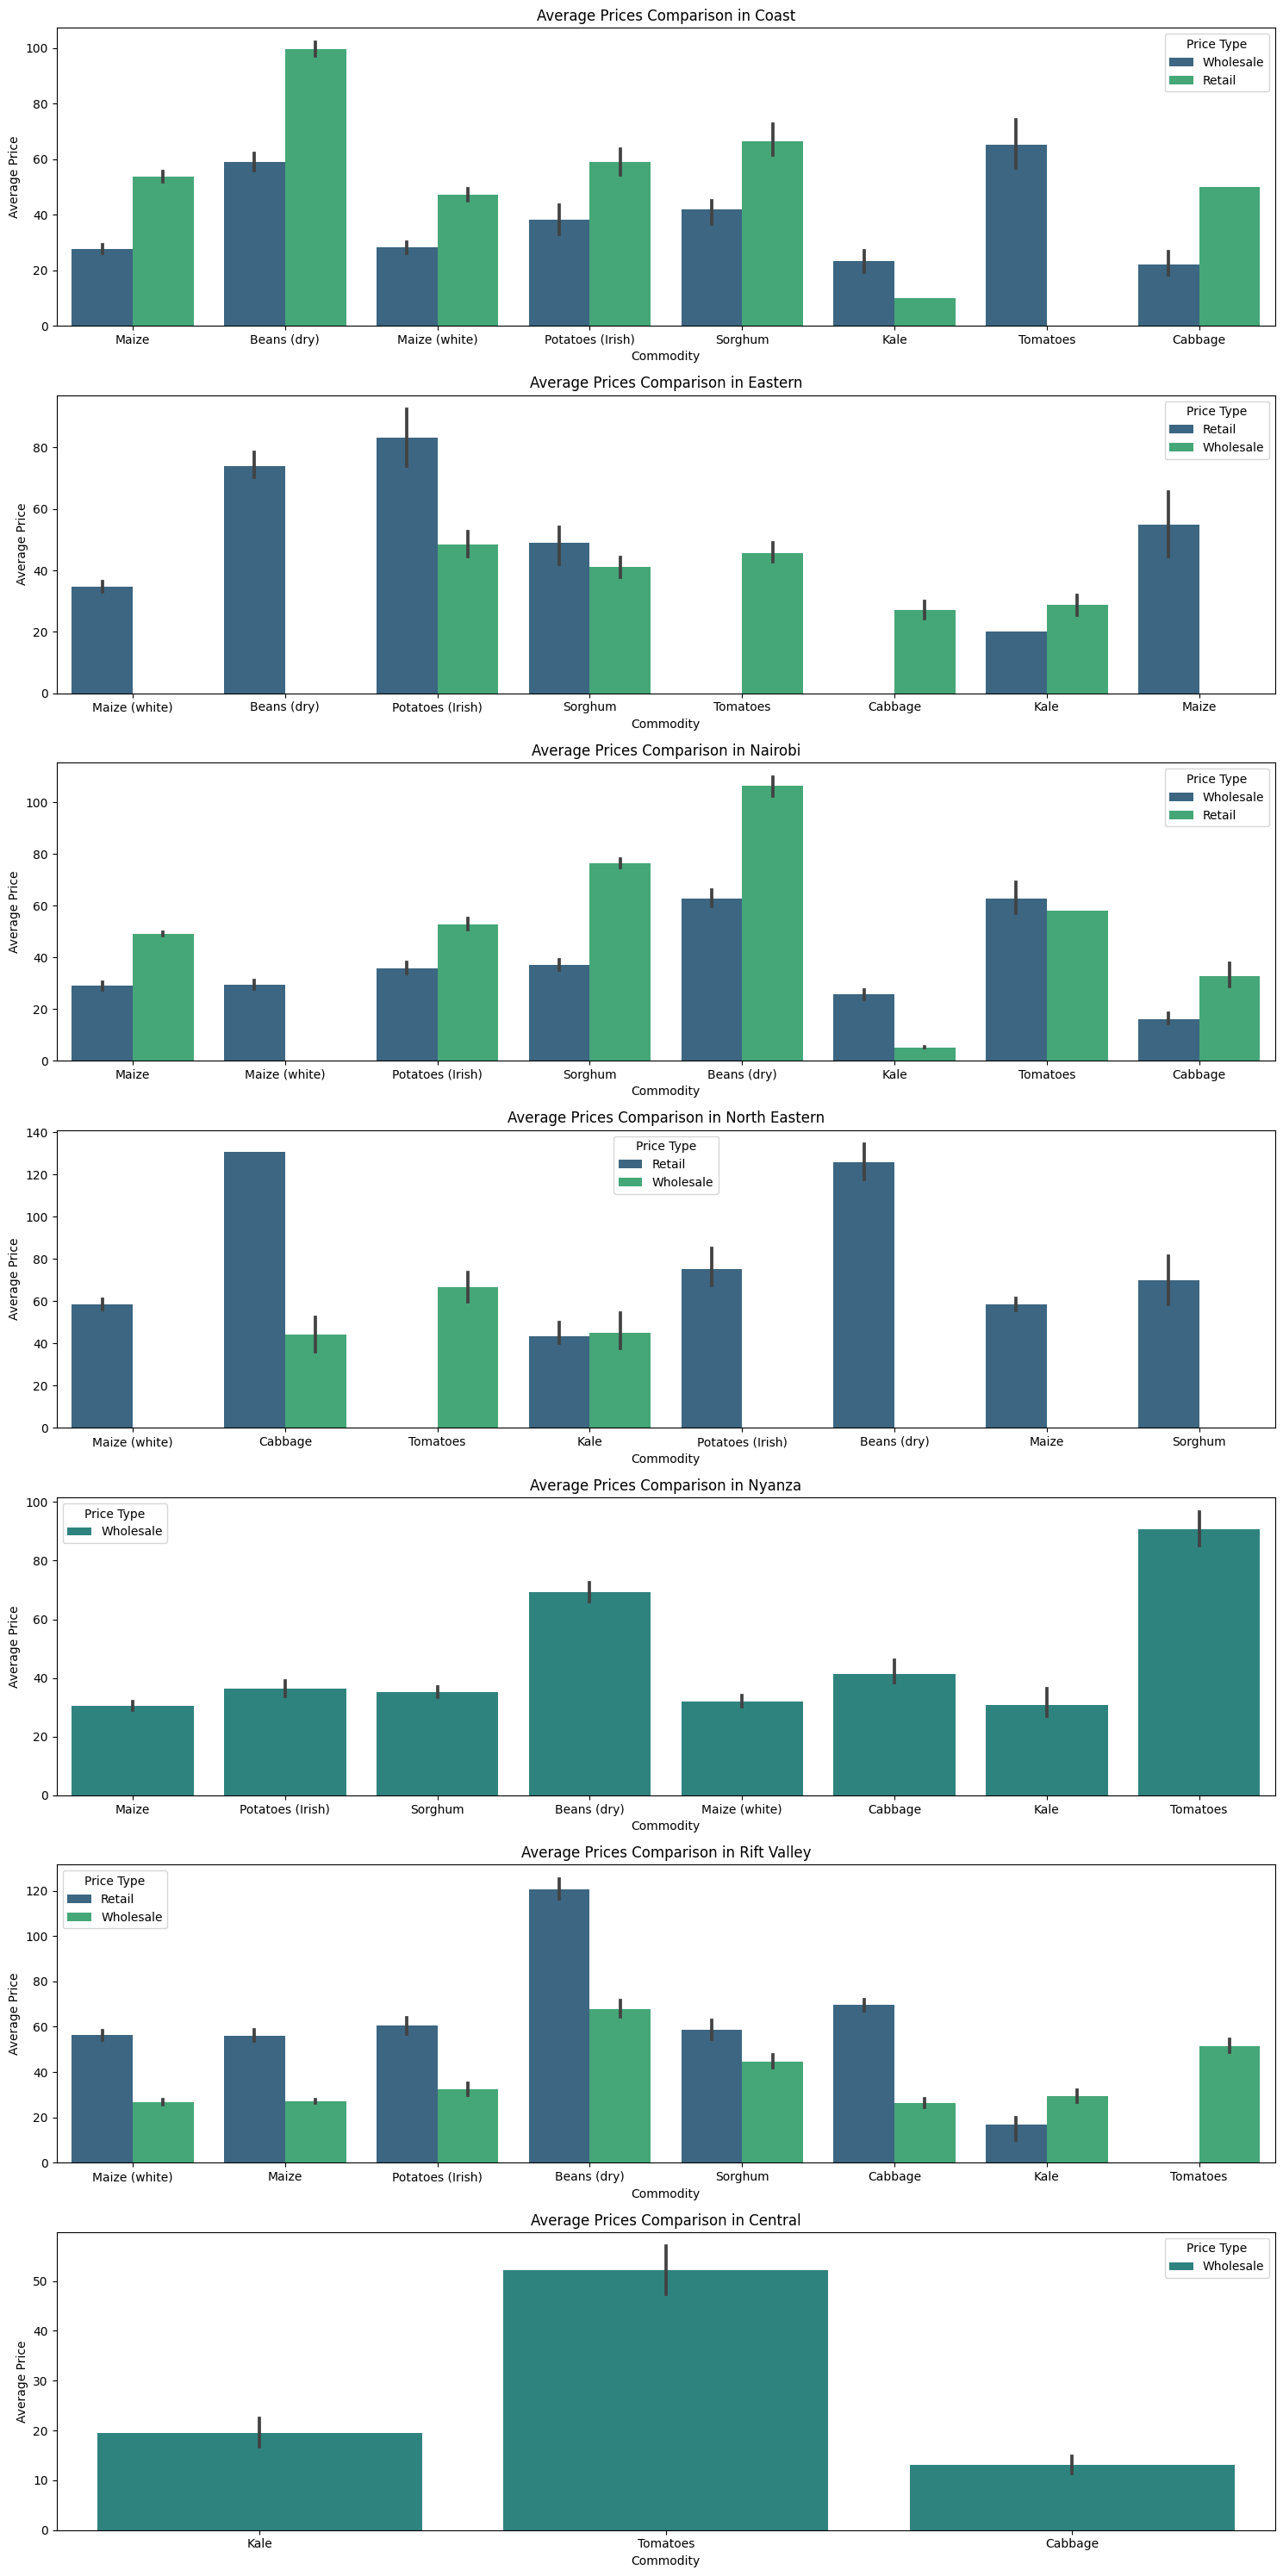

In [38]:
# Create subplots
fig, ax = plt.subplots(len(provinces_list), 1, figsize=(15, 30))

# Loop over provinces
for idx, province in enumerate(provinces_list):
    province_df = filtered_df[filtered_df['Provinces'] == province]

    # Plot average prices comparison
    sns.barplot(x='commodity', y='price_per_standard_unit', hue='pricetype', data=province_df, palette='viridis', ax=ax[idx])
    ax[idx].set_xlabel("Commodity")
    ax[idx].set_ylabel("Average Price")
    ax[idx].set_title(f"Average Prices Comparison in {province}")
    ax[idx].legend(title='Price Type')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
# Group by 'province' and 'pricetype', then count the number of unique 'pricetype' for each 'province'
price_type_counts = df.groupby('Provinces')['pricetype'].nunique()

# Check provinces with only one unique 'pricetype'
provinces_with_single_price_type = price_type_counts[price_type_counts == 1].index.tolist()

print("Provinces with only one price type:", provinces_with_single_price_type)


Provinces with only one price type: ['Central', 'Nyanza']


Correlation

Correlation between Price and Provinces:
                         province_code  price_per_standard_unit
province_code                 1.000000                 0.084609
price_per_standard_unit       0.084609                 1.000000

Correlation between Price and Market Type:
                         market_code  price_per_standard_unit
market_code                  1.00000                 -0.11864
price_per_standard_unit     -0.11864                  1.00000


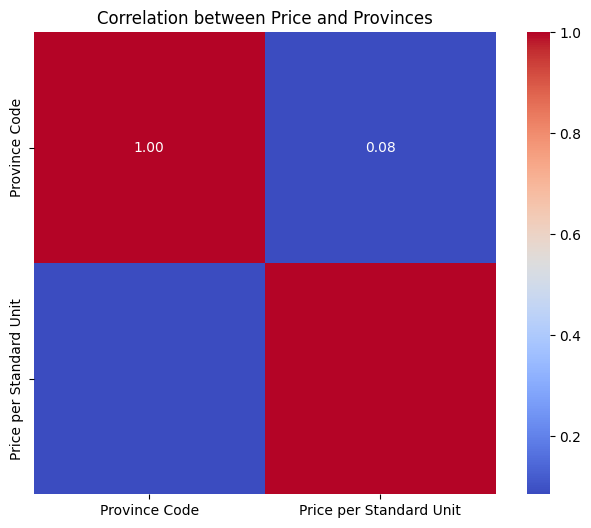

In [40]:
df['province_code'] = df['Provinces'].astype('category').cat.codes
price_province_corr = df[['province_code', 'price_per_standard_unit']].corr()

df['market_code'] = df['market'].astype('category').cat.codes
price_market_corr = df[['market_code', 'price_per_standard_unit']].corr()

print("Correlation between Price and Provinces:")
print(price_province_corr)

print("\nCorrelation between Price and Market Type:")
print(price_market_corr)

# Correlation between Price and Provinces
plt.figure(figsize=(8, 6))
sns.heatmap(price_province_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            xticklabels=['Province Code', 'Price per Standard Unit'],
            yticklabels=['Province Code', 'Price per Standard Unit'])
plt.title('Correlation between Price and Provinces')
plt.show()




There is a weak positive correlation between price and provinces, with a correlation coefficient of approximately 0.08. This suggests that there might be some influence of provinces on prices, although the relationship is not strong.

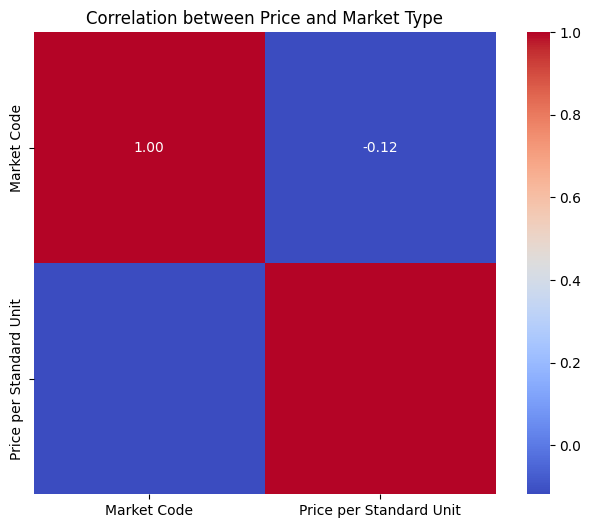

In [41]:
# Correlation between Price and market type
plt.figure(figsize=(8, 6))
sns.heatmap(price_market_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            xticklabels=['Market Code', 'Price per Standard Unit'],
            yticklabels=['Market Code', 'Price per Standard Unit'])
plt.title('Correlation between Price and Market Type')
plt.show()

There is a weak negative correlation between price and market type, with a correlation coefficient of approximately -0.12. This indicates that there might be a slight tendency for prices to vary inversely with the type of market

Price Comparison of selected commodities across different markets

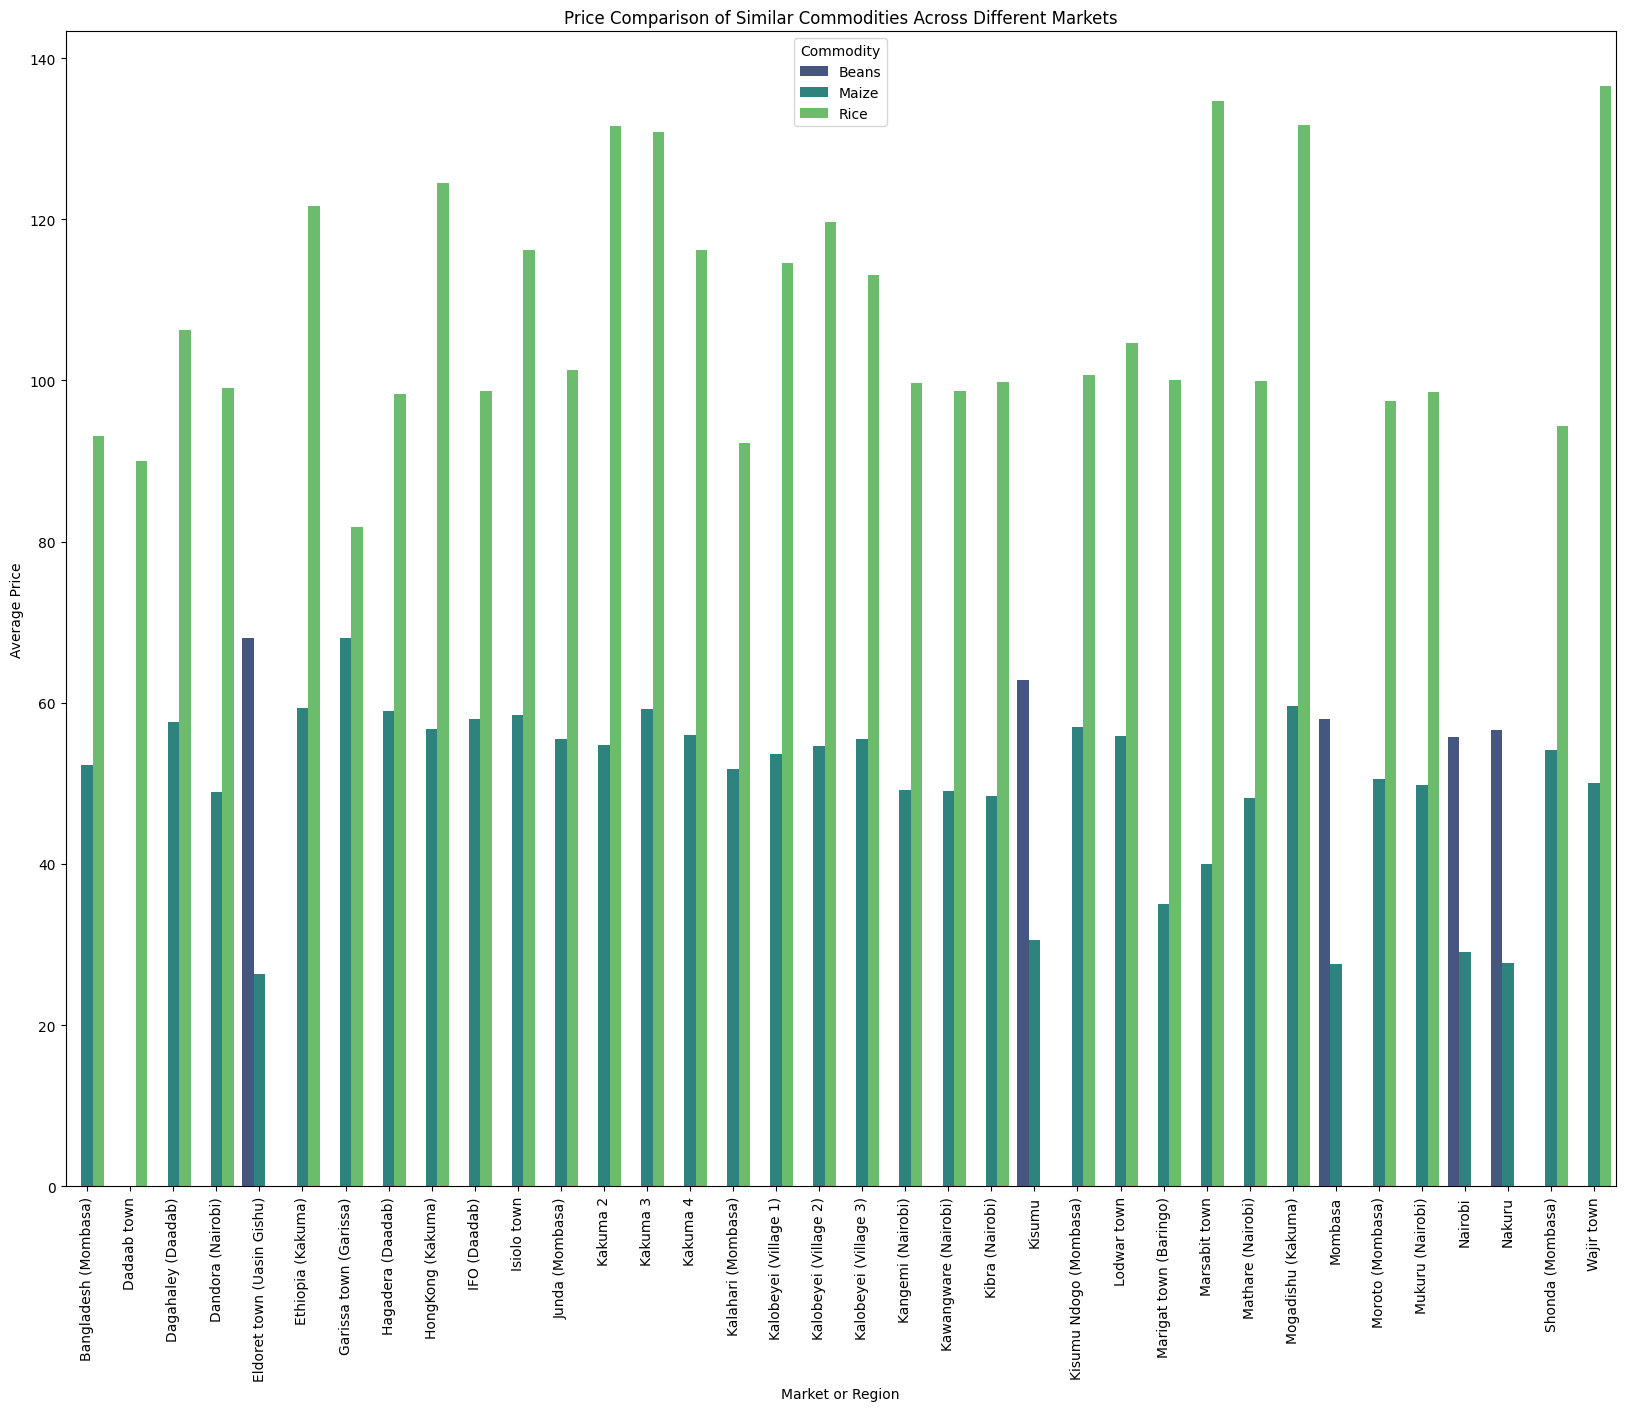

In [42]:
selected_commodities = ['Maize', 'Beans', 'Rice']

# Filter the dataset to include only data for the selected commodities
selected_commodities_df = df[df['commodity'].isin(selected_commodities)]

# Group the data by market or region and calculate summary statistics for prices
grouped_data = selected_commodities_df.groupby(['market', 'commodity'])['price_per_standard_unit'].mean().unstack()


grouped_data = grouped_data.reset_index()

# Melt the dataframe to long format for Seaborn plotting
melted_data = pd.melt(grouped_data, id_vars='market', var_name='commodity', value_name='average_price')

# Plot using Seaborn
plt.figure(figsize=(20, 15))
sns.barplot(data=melted_data, x='market', y='average_price', hue='commodity', palette='viridis')
plt.title('Price Comparison of Similar Commodities Across Different Markets')
plt.xlabel('Market or Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend(title='Commodity')
plt.show()

In [43]:

# Identify top 10 selling commodities
top_10_commodities = df['commodity'].value_counts().nlargest(10).index.tolist()

# Filter DataFrame for top 10 commodities
filtered_df1 = df[df['commodity'].isin(top_10_commodities)]

# Calculate average price per commodity at each location
pivot_df = filtered_df1.pivot_table(index=['latitude', 'longitude'], columns='commodity', values='price_per_standard_unit', aggfunc='mean').reset_index()

# Replace NaN values with 0
pivot_df.fillna(0, inplace=True)

# Create a base map of Kenya using folium
kenya_map = folium.Map(location=[-0.0236, 37.9062], zoom_start=6)

# Define custom color gradient for commodities
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue', 'darkgreen']

# Loop through each commodity and add its heatmap layer to the base map
for idx, commodity in enumerate(top_10_commodities):
    color = colors[idx % len(colors)]  
    if commodity in pivot_df.columns:
        HeatMap(pivot_df[['latitude', 'longitude', commodity]].values.tolist(), 
                radius=15, 
                name=commodity, 
                gradient={0.0: color, 1.0: color}).add_to(kenya_map)
        
# Add LayerControl to toggle between different heatmaps
folium.LayerControl().add_to(kenya_map)

# Display the map
display(HTML(kenya_map._repr_html_()))


Modelling

Regression Analysis

Simple linear regression using only Provinces and price_per_standard_unit

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats

# Split data into train and test sets
X = df[['Provinces']]
y = df['price_per_standard_unit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'province' column
X_train_encoded = encoder.fit_transform(X_train).toarray()
X_test_encoded = encoder.transform(X_test).toarray()

# Add constant to the independent variables
X_train_encoded = sm.add_constant(X_train_encoded)
X_test_encoded = sm.add_constant(X_test_encoded)

# Create a linear regression model using statsmodels
model = sm.OLS(y_train, X_train_encoded).fit()

# Print the model summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     price_per_standard_unit   R-squared:                       0.033
Model:                                 OLS   Adj. R-squared:                  0.032
Method:                      Least Squares   F-statistic:                     41.95
Date:                     Fri, 26 Apr 2024   Prob (F-statistic):           1.45e-58
Time:                             12:27:50   Log-Likelihood:                -51212.
No. Observations:                     8612   AIC:                         1.024e+05
Df Residuals:                         8604   BIC:                         1.025e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

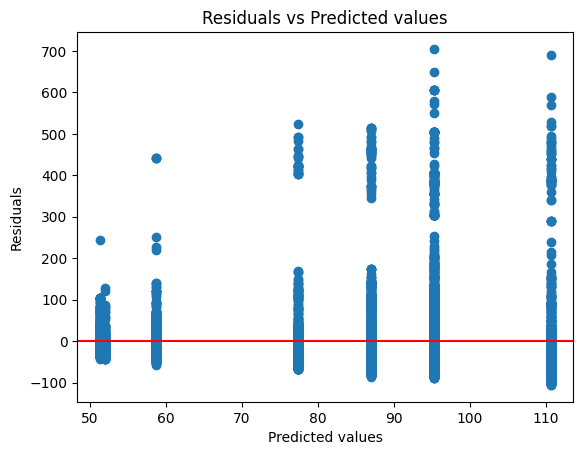

In [45]:

# Step 1: Calculate the residuals
residuals = model.resid

# Step 2: Plot residuals against the predicted values
plt.scatter(model.predict(X_train_encoded), residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

There is a constant spread of points around the horizontal line at zero indicating homoscedasticity.

Regression model using multiple variables

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import pandas as pd


# Split data into train and test sets
X1 = df[['date', 'Provinces', 'Counties', 'market', 'category', 'commodity', 'pricetype']]
y1 = df['price_per_standard_unit']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Define transformers for categorical columns
categorical_transformer = OneHotEncoder()

# Column transformer to handle both types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['date', 'Provinces', 'Counties', 'market', 'category', 'commodity', 'pricetype'])
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train1, y_train1)

# Get preprocessed data
X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train1)

# Convert sparse matrix to dense matrix
X_train_preprocessed = X_train_preprocessed.toarray()

# Add constant to the independent variables
X_train_preprocessed = sm.add_constant(X_train_preprocessed)

# Fit the OLS model
model = sm.OLS(y_train1, X_train_preprocessed).fit()

# Print the model summary
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     price_per_standard_unit   R-squared:                       0.956
Model:                                 OLS   Adj. R-squared:                  0.954
Method:                      Least Squares   F-statistic:                     558.3
Date:                     Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                             12:27:52   Log-Likelihood:                -37928.
No. Observations:                     8612   AIC:                         7.650e+04
Df Residuals:                         8290   BIC:                         7.877e+04
Df Model:                              321                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

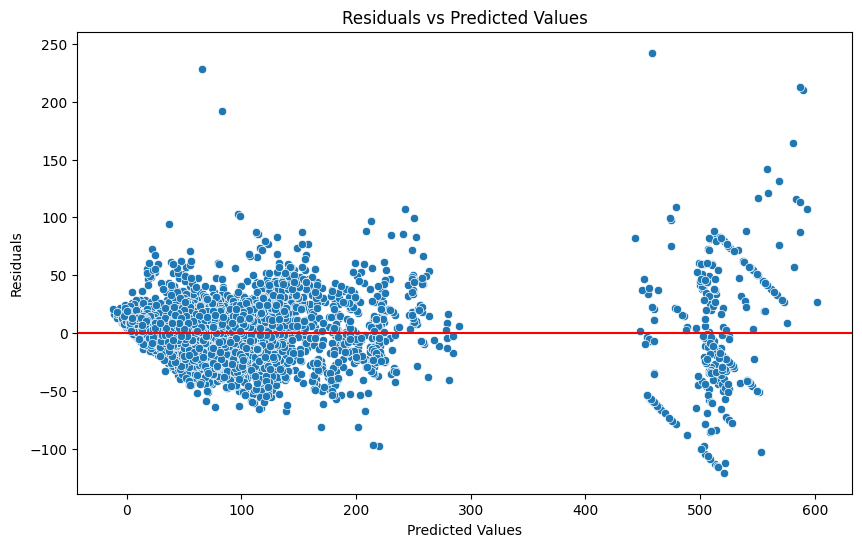

In [47]:
# Calculate residuals
residuals1 = model.resid

# Predicted values
predicted_values1 = model.predict(X_train_preprocessed)

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values1, y=residuals1)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Time Series Modelling

In [49]:
df['year'] = df['date'].dt.year

In [56]:
ts_df = df.copy()
columns_to_keep = ['date', 'category', 'commodity', 'pricetype', 'price_per_standard_unit', 'year']

# Create a new DataFrame with specified columns retained
ts_df = df.loc[:, columns_to_keep]
ts_df.set_index('date', inplace=True)
# Display the new DataFrame
ts_df

,category,commodity,pricetype,price_per_standard_unit,year
date,,,,,
2006-01-15,cereals and tubers,Maize,Wholesale,16.130000,2006
2006-01-15,pulses and nuts,Beans,Wholesale,33.630000,2006
2006-01-15,pulses and nuts,Beans (dry),Wholesale,36.066667,2006
2006-01-15,cereals and tubers,Maize (white),Retail,17.000000,2006
2006-01-15,pulses and nuts,Beans (dry),Retail,39.000000,2006
...,...,...,...,...,...
2023-12-15,cereals and tubers,Maize flour,Retail,92.000000,2023
2023-12-15,cereals and tubers,Potatoes (Irish),Retail,73.000000,2023
2023-12-15,"meat, fish and eggs",Meat (goat),Retail,800.000000,2023


C:\Users\nyamb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nyamb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


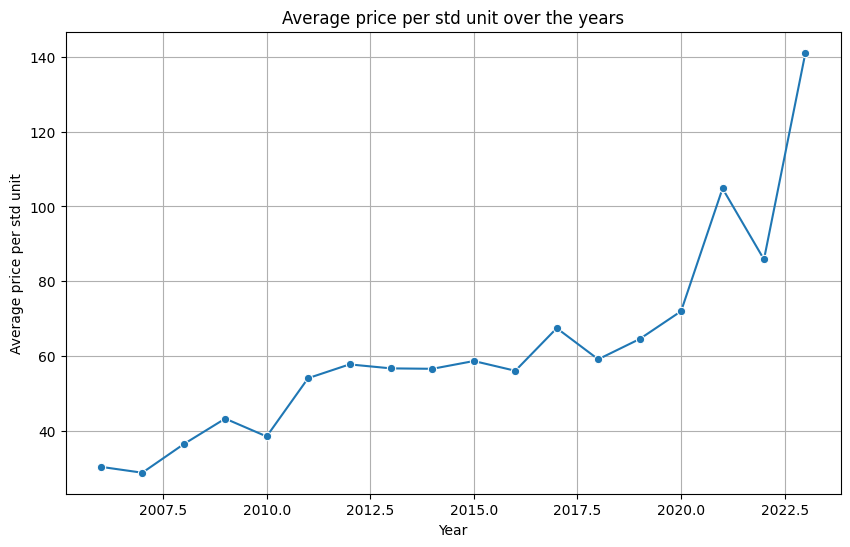

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=ts_df, x='year', y='price_per_standard_unit', estimator='mean', marker='o',errorbar=None)
plt.title('Average price per std unit over the years')
plt.xlabel('Year')
plt.ylabel('Average price per std unit')
plt.grid(True)
plt.show()

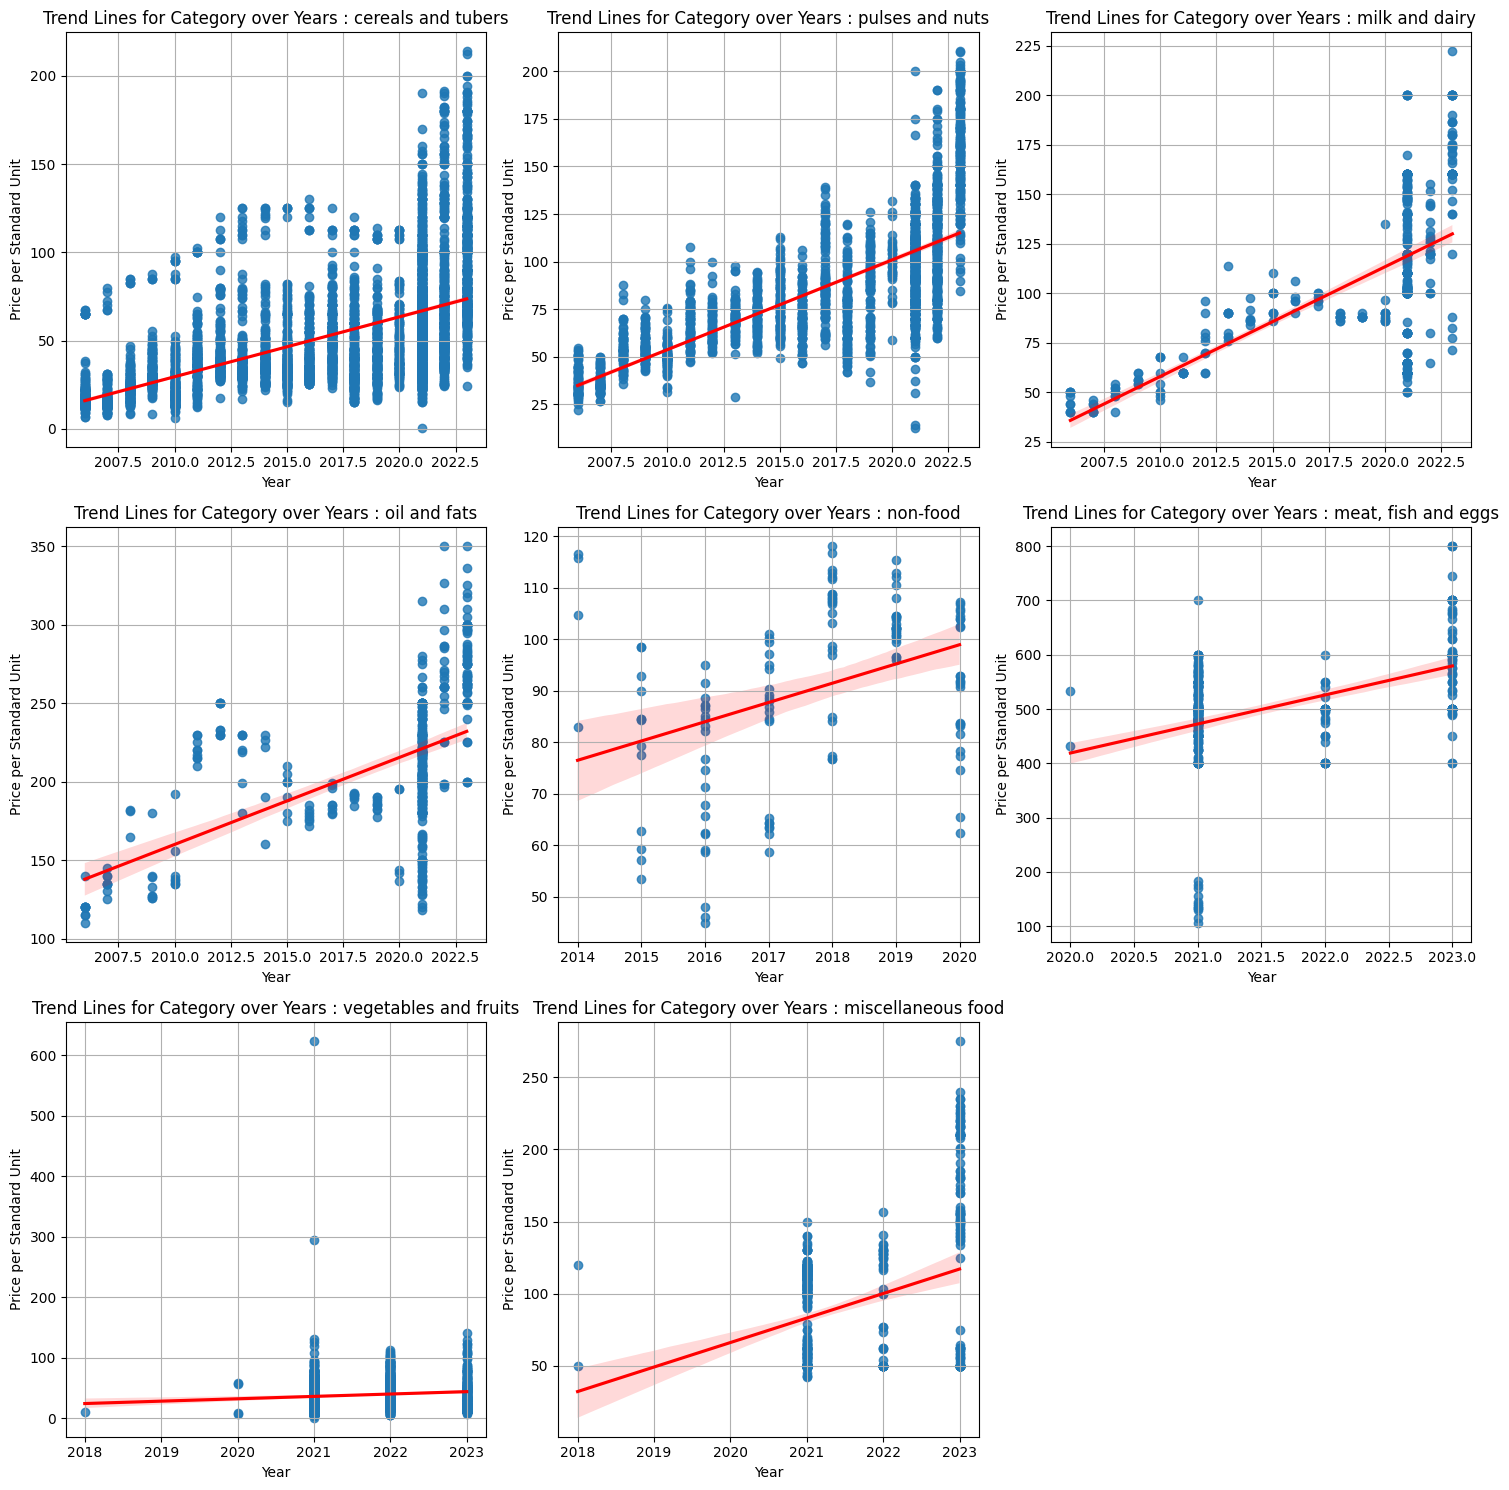

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of columns for subplots
num_cols = 3

# Filter the data for each category
categories = ts_df['category'].unique()
num_categories = len(categories)

# Calculate the number of rows needed based on the number of categories and number of columns
num_rows = (num_categories + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array if it's multidimensional
axes = axes.flatten()

# Plotting the trend line for each category
for i, category in enumerate(categories):
    category_data = ts_df[ts_df['category'] == category]
    ax = axes[i]
    
    sns.regplot(data=category_data, x='year', y='price_per_standard_unit', marker='o', line_kws={'color': 'red'}, ax=ax)
    ax.set_title(f'Trend Lines for Category over Years : {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price per Standard Unit')
    ax.grid(True)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


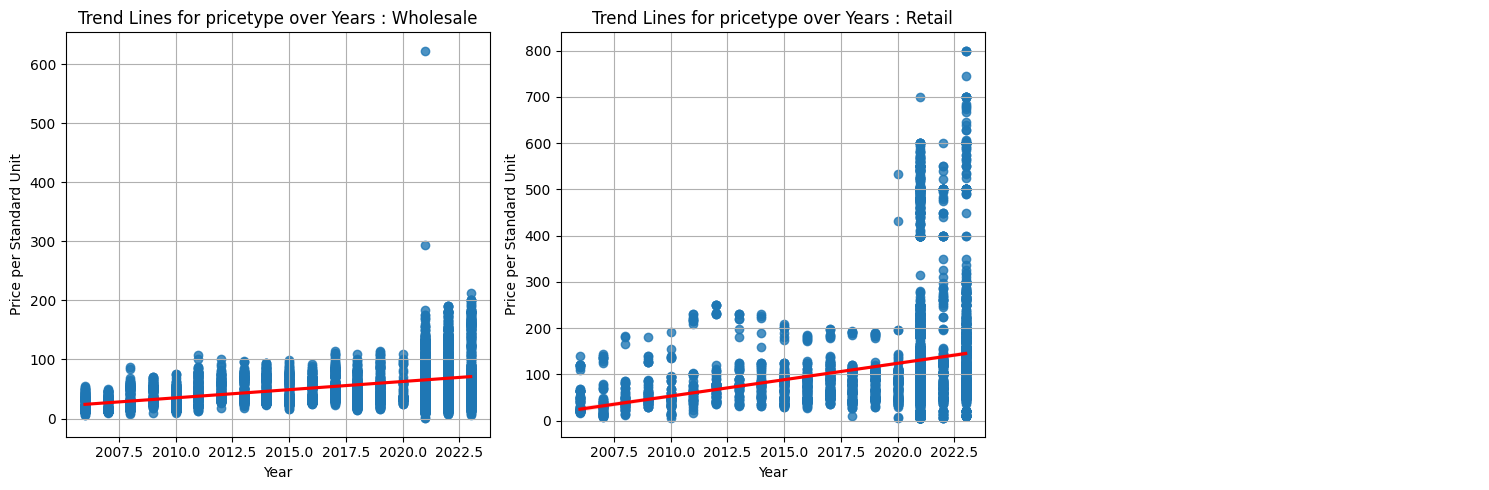

In [76]:
# Set the number of columns for subplots
num_cols = 3

# Filter the data for each category
categories = ts_df['pricetype'].unique()
num_categories = len(categories)

# Calculate the number of rows needed based on the number of categories and number of columns
num_rows = (num_categories + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array if it's multidimensional
axes = axes.flatten()

# Plotting the trend line for each category
for i, category in enumerate(categories):
    category_data = ts_df[ts_df['pricetype'] == category]
    ax = axes[i]
    
    sns.regplot(data=category_data, x='year', y='price_per_standard_unit', marker='o', line_kws={'color': 'red'}, ax=ax)
    ax.set_title(f'Trend Lines for pricetype over Years : {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price per Standard Unit')
    ax.grid(True)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Category: cereals and tubers
Category: pulses and nuts
Category: milk and dairy
Category: oil and fats
Category: non-food
Category: meat, fish and eggs
Category: vegetables and fruits
Category: miscellaneous food


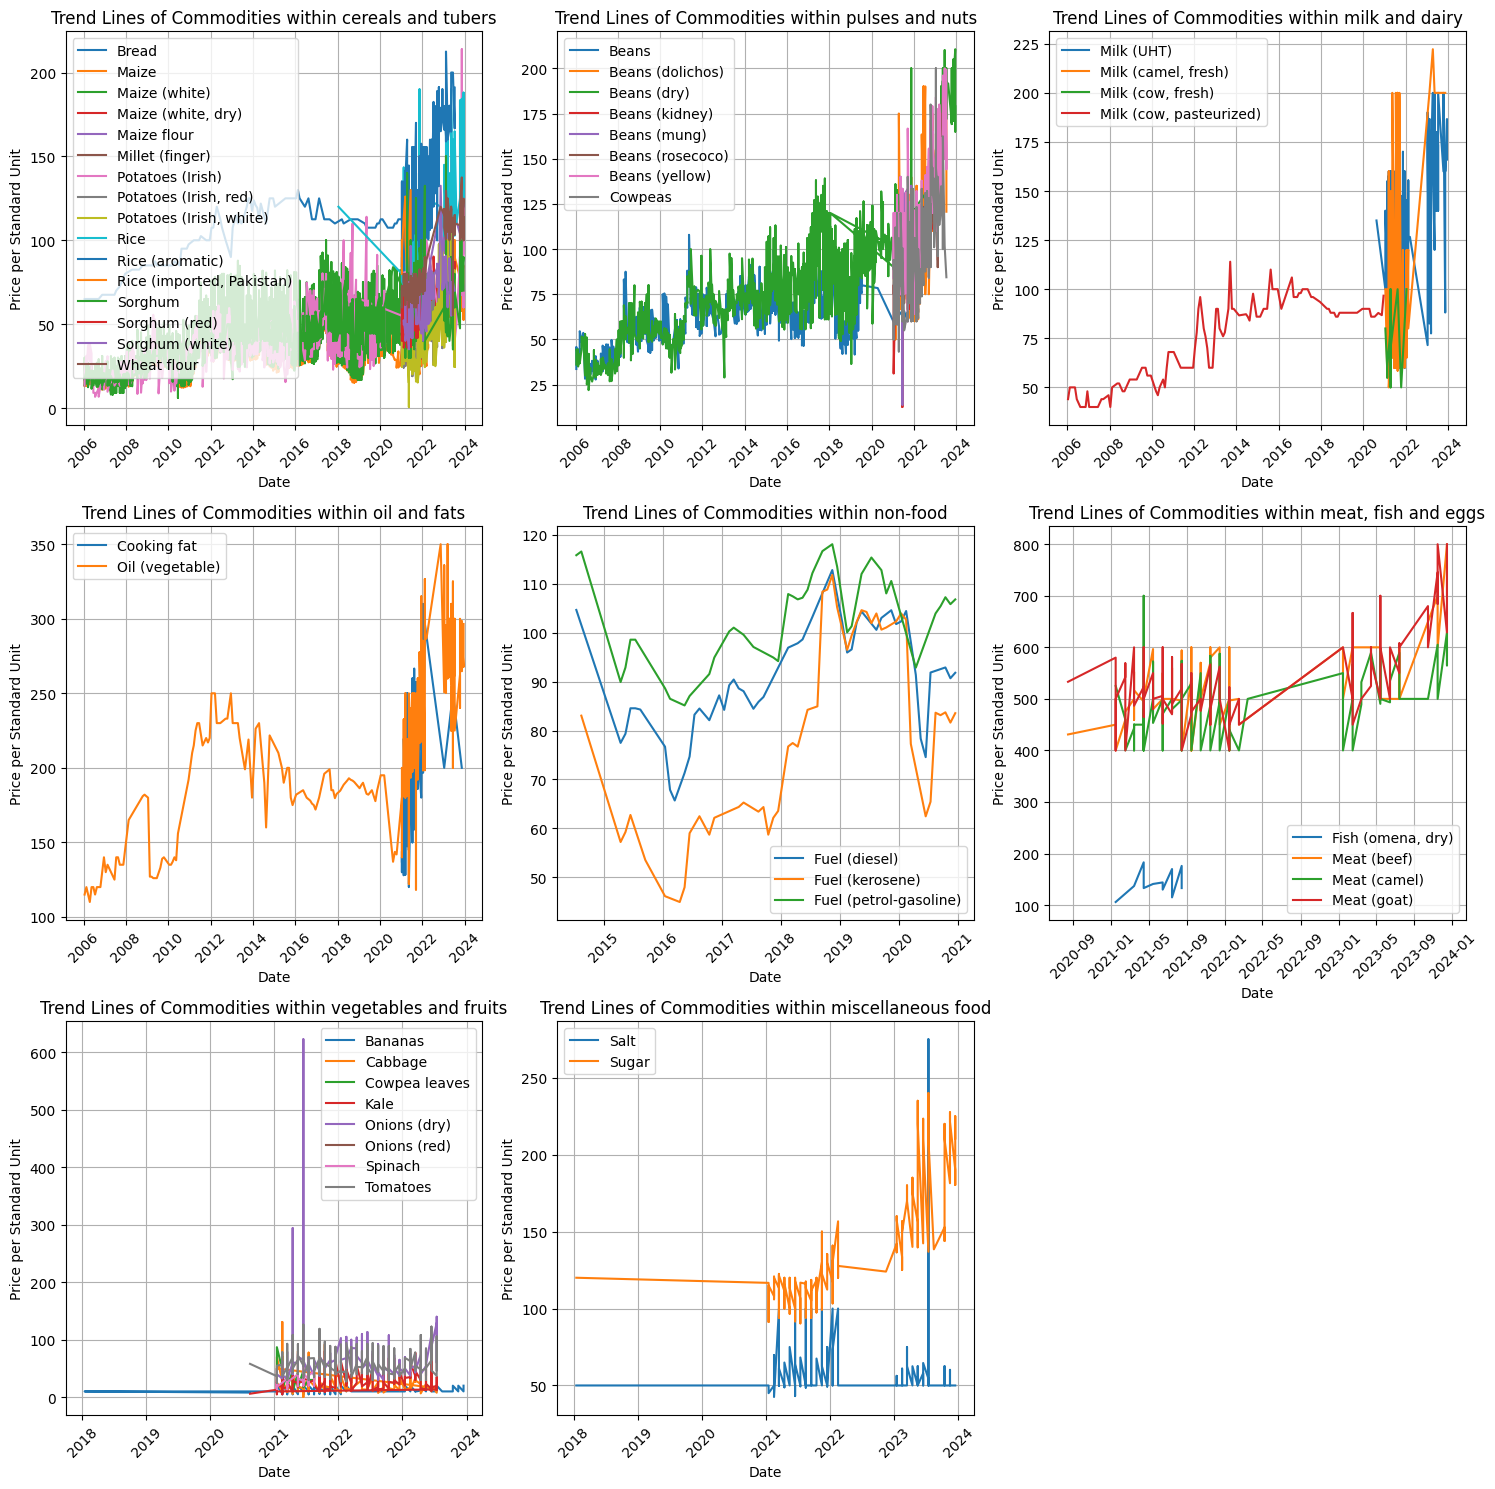

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique categories
categories = df['category'].unique()

# Define the number of rows and columns for subplots
num_plots = len(categories)
num_cols = 3  # Number of columns for the subplots

# Calculate the number of rows needed
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each category
for i, category_name in enumerate(categories):
    print("Category:", category_name)
    
    # Filter the data by category
    category_data = df[df['category'] == category_name]
    
    # Group by commodity
    grouped_data = category_data.groupby('commodity')
    
    # Plot trend lines for each commodity within the category
    for commodity, data in grouped_data:
        if 'date' in data.columns and 'price_per_standard_unit' in data.columns and not data.empty:
            axes[i].plot(data['date'], data['price_per_standard_unit'], label=commodity)
 
    # Set title and labels for the subplot
    axes[i].set_title('Trend Lines of Commodities within ' + category_name)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price per Standard Unit')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Hide empty subplots
for j in range(num_plots, num_cols*num_rows):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
